<a href="https://colab.research.google.com/github/MeherBhaskar/MNIST_Classification/blob/master/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist 

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


## Check data


In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

for i in range(0,7):
  rand = np.random.randint(0, len(x_train))
  image = x_train[rand]
  print('Image of {}'.format(str(y_train[rand])))
  cv2_imshow(image)


Image of 6


Image of 8


Image of 6


Image of 0


Image of 5


Image of 7


Image of 8


# Format images so that they can be given as imput to Keras

In [4]:
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
print('Shape after formating', x_train.shape)

img_shape = (x_train.shape[1], x_train.shape[2], 1)
print(img_shape)

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train/=255
x_test/=255

(60000, 28, 28)
Shape after formating (60000, 28, 28, 1)
(28, 28, 1)


In [5]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_train.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]


# Build and Train the Model

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD

## Build the model

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = img_shape))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = SGD(0.01), metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [7]:
# Train the model

batch_size = 64
epochs = 10

history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.7721 - accuracy: 0.7580 - val_loss: 0.2562 - val_accuracy: 0.9250
Epoch 2/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.3631 - accuracy: 0.8877 - val_loss: 0.1909 - val_accuracy: 0.9416
Epoch 3/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.2983 - accuracy: 0.9101 - val_loss: 0.1574 - val_accuracy: 0.9566
Epoch 4/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.2555 - accuracy: 0.9230 - val_loss: 0.1276 - val_accuracy: 0.9642
Epoch 5/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.2240 - accuracy: 0.9329 - val_loss: 0.1121 - val_accuracy: 0.9668
Epoch 6/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.1991 - accuracy: 0.9409 - val_loss: 0.0967 - val_accuracy: 0.9699
Epoch 7/10
60000/60000 [==============================] - 4s 72us/

In [8]:
print('Test Loss : {}'.format(score[0]))
print('Test Accuracy : {}'.format(score[1]))

Test Loss : 0.061851457875501364
Test Accuracy : 0.9807000160217285


# Plot loss, accuracy charts  

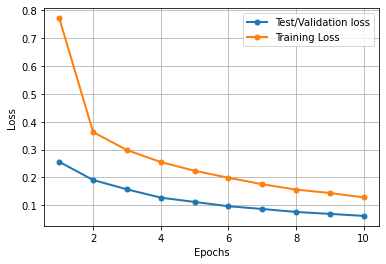

In [15]:
import matplotlib.pyplot as plt

history_dic = history.history

loss_vals = history_dic['loss']
val_loss_vals = history_dic['val_loss']
epochs = range(1, len(loss_vals)+1)

line1 = plt.plot(epochs, val_loss_vals, label = 'Test/Validation loss')
line2 = plt.plot(epochs, loss_vals, label = 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '.', markersize = 10)
plt.setp(line2, linewidth=2.0, marker = '.', markersize = 10)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

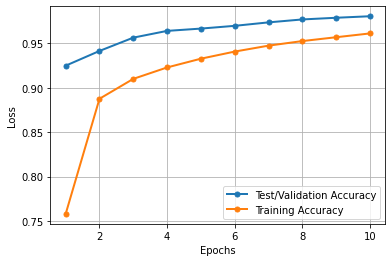

In [18]:
import matplotlib.pyplot as plt

history_dic = history.history

acc_vals = history_dic['accuracy']
val_acc_vals = history_dic['val_accuracy']
epochs = range(1, len(acc_vals)+1)

line1 = plt.plot(epochs, val_acc_vals, label = 'Test/Validation Accuracy')
line2 = plt.plot(epochs, acc_vals, label = 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '.', markersize = 10)
plt.setp(line2, linewidth=2.0, marker = '.', markersize = 10)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()